# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/TT5/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.shape

(52000, 26)

In [5]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [6]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
51995,False
51996,False
51997,False
51998,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [10]:
df.sample(8)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
12800,518320.0,166670.0,-0.300992,51.386694,1,3.0,2,1.0,01/03/2005,3,...,4,3364,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2005
24245,524120.0,164710.0,-0.218365,51.367841,1,3.0,1,1.0,28/07/2014,2,...,5,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2014
35151,542660.0,175520.0,0.052145,51.460628,1,3.0,2,1.0,30/11/2007,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,1.0,Yes,2007
25037,576610.0,185980.0,0.545612,51.545022,42,2.0,1,1.0,26/08/2009,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,2.0,Yes,2009
39287,429280.0,542900.0,-1.546283,54.780177,11,2.0,2,3.0,16/07/2011,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2011
27998,249660.0,60100.0,-4.117760,50.421400,50,3.0,3,2.0,07/07/2006,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006
27597,602778.0,333164.0,1.010565,52.857729,36,3.0,2,1.0,26/03/2014,4,...,4,1110,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2014
14977,399600.0,395810.0,-2.007497,53.459030,6,3.0,2,2.0,03/09/2009,5,...,3,57,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,2.0,Yes,2009


In [11]:
df.duplicated().sum()

43

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
for col in df.columns:
  print(df[col].value_counts(), '\n')

Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    13
531000.0    13
530980.0    13
            ..
219170.0     1
252360.0     1
454110.0     1
452604.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64 

Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
184780.0    14
            ..
212350.0     1
512190.0     1
213030.0     1
345086.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64 

Longitude
-0.100610    5
-0.570203    4
-2.948497    4
-0.096159    4
-0.010762    3
            ..
 0.507012    1
 0.516207    1
-0.018085    1
-1.531466    1
-1.212104    1
Name: count, Length: 50901, dtype: int64 

Latitude
51.515721    5
51.570594    4
53.211710    4
53.404118    4
51.513652    3
            ..
51.273057    1
51.610488    1
53.796169    1
51.409631    1
51.565050    1
Name: count, Length: 50701, dtype: int64 

Police_Force
1     7802
20    2047
6     2000
43    1925
13    1923
46    1644
44    1592
4     1547
50 

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'Location_Easting_OSGR'),
  Text(2, 0, 'Location_Northing_OSGR'),
  Text(3, 0, 'Longitude'),
  Text(4, 0, 'Latitude'),
  Text(5, 0, 'Police_Force'),
  Text(6, 0, 'Accident_Severity'),
  Text(7, 0, 'Number_of_Vehicles'),
  Text(8, 0, 'Number_of_Casualties'),
  Text(9, 0, 'Day_of_Week'),
  Text(10, 0, 'Local_Authority_(District)'),
  Text(11, 0, '1st_Road_Class'),
  Text(12, 0, '1st_Road_Number'),
  Text(13, 0, 'Speed_limit'),
  Text(14, 0, '2nd_Road_Class'),
  Text(15, 0, '2nd_Road_Number'),
  Text(16, 0, 'Urban_or_Rural_Area'),
  Text(17, 0, 'Year')])

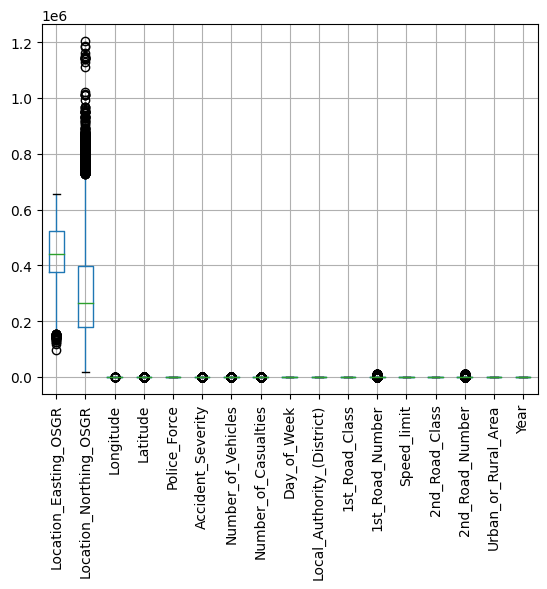

In [14]:
df.boxplot()
plt.xticks(rotation=90)

In [15]:
def remove_outlier(df,coulmn):
    Q1=df[coulmn].quantile(0.25)
    Q3=df[coulmn].quantile(0.75)
    IQR= Q3-Q1
    lower_bound=Q1 - 1.5 *IQR
    upper_bound=Q3 + 1.5 *IQR
    return df[(df[coulmn]>=lower_bound) & (df[coulmn]<=upper_bound)]

In [16]:
df=remove_outlier(df,'Location_Easting_OSGR')
df=remove_outlier(df,'Location_Northing_OSGR')


In [17]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,318
Number_of_Vehicles,0
Number_of_Casualties,1025
Date,0
Day_of_Week,0


In [18]:
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])

In [19]:
df['Light_Conditions'] = df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])

In [20]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])

In [21]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mode()[0])

In [22]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [24]:
features = df[['Longitude','Latitude','Accident_Severity','Number_of_Vehicles','Number_of_Casualties']]

In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<function matplotlib.pyplot.show(close=None, block=None)>

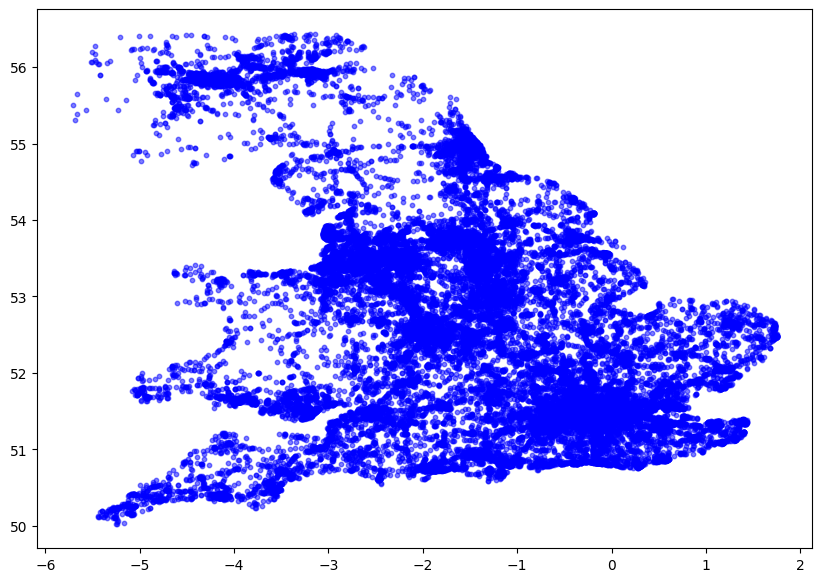

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(df['Longitude'],df['Latitude'], alpha= 0.5, c='blue', s=10, marker='o')
plt.show



## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [27]:
pca = PCA(n_components=0.9)
redus_df = pca.fit_transform(scaled_features)

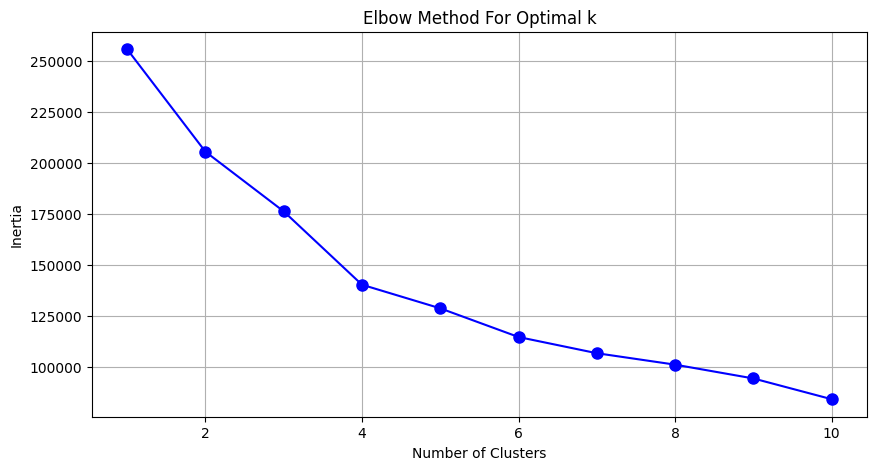

In [28]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redus_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [29]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(redus_df)

labels = kmeans.labels_

df['Cluster'] = labels

print(df.head())

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            47                3.0                   1                   1.0   
1             1                3.0                   2                   1.0   
2            62                3.0                   2                   1.0   
3             4                3.0                   1                   2.0   
4            21                3.0                   2                   2.0   

         Date  Day_of_Week  ...  2nd_Road_Number  \
0  27/11/2009         

In [30]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Cluster
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009,0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010,4
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005,2
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007,5
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012,4
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013,0
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011,4
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011,2


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [33]:
from sklearn.metrics import silhouette_score

In [31]:
KM = KMeans(n_clusters=5,init='k-means++', random_state=42)
KMeanModel = KM.fit(redus_df)

In [34]:
KM_silhouette_score = silhouette_score(redus_df, KMeanModel.labels_)
print(f'Silhouette Coefficient : %0.2f' %KM_silhouette_score)


Silhouette Coefficient : 0.27


## Plot the data points with their predicted cluster center

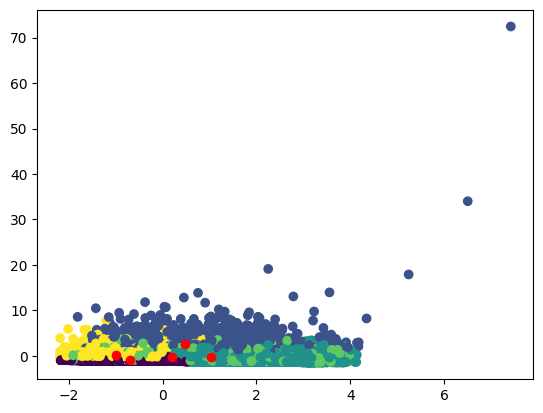

In [36]:
plt.scatter(redus_df[:, 0], redus_df[:, 1], c=KMeanModel.labels_)
plt.scatter(KMeanModel.cluster_centers_[:, 0], KMeanModel.cluster_centers_[:, 1], color='r')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

1-I use multible feauters like:Number_of_vehicles
2- I use to evalute shilhoutte_score and performence ratio is 0.27